# THÔNG TIN SINH VIÊN
Mã số sinh viên: 23127447  
Họ và tên: Nguyễn Thanh Owen  
Lớp: 23CLC06  
Đồ án: Linear Regression
Email: ntowen23@clc.fitus.edu.vn

## Xử lý dữ liệu thiếu (Missing Values)

Trước khi tiến hành phân tích và xây dựng mô hình, việc kiểm tra và xử lý các giá trị thiếu trong dữ liệu là rất quan trọng để đảm bảo kết quả chính xác và ổn định.

Các bước thực hiện:

1. Đọc dữ liệu từ file `wine.csv`.
2. Kiểm tra số lượng giá trị thiếu (`NaN`) trên từng cột.
3. Đếm số lượng dòng có ít nhất một giá trị thiếu.
4. Loại bỏ những dòng dữ liệu chứa giá trị thiếu để có bộ dữ liệu sạch, sẵn sàng cho các bước tiếp theo.

Việc loại bỏ các dòng chứa giá trị thiếu giúp tránh các lỗi không mong muốn trong quá trình xử lý dữ liệu và huấn luyện mô hình, đồng thời đảm bảo tính nhất quán và độ tin cậy của kết quả.


In [404]:
import pandas as pd
df = pd.read_csv('wine.csv')
# Loại bỏ dấu ngoặc kép khỏi tên cột
df.columns = [col.replace('"', '') for col in df.columns]
print("Dữ liệu từ file wine.csv:")
df


Dữ liệu từ file wine.csv:


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8



Đoạn mã trên thực hiện các bước xử lý dữ liệu thiếu trong một `DataFrame`:

1. **Kiểm tra giá trị thiếu theo cột**  
   Sử dụng `df.isnull().sum()` để đếm số lượng giá trị bị thiếu trong mỗi cột.  
   Kết quả được in ra để người dùng biết cột nào có giá trị thiếu và bao nhiêu.

2. **Đếm số dòng có ít nhất một giá trị thiếu**  
   Sử dụng `df.isnull().any(axis=1).sum()` để xác định số lượng dòng chứa ít nhất một ô bị thiếu.

3. **Xoá các dòng có giá trị thiếu**  
   Sử dụng `df.dropna()` để xoá toàn bộ các dòng có chứa giá trị thiếu trong bất kỳ cột nào.

4. **In số dòng còn lại sau khi xoá**  
   Sau khi làm sạch, in ra tổng số dòng còn lại trong `DataFrame`.



In [405]:
missing_counts = df.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_counts)

total_missing_rows = df.isnull().any(axis=1).sum()
print(f"\nTổng số dòng có ít nhất một giá trị thiếu: {total_missing_rows}")

df = df.dropna()
print(f"Số dòng sau khi xử lí dữ liệu: {len(df)}")

Số lượng giá trị thiếu trong mỗi cột:
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Tổng số dòng có ít nhất một giá trị thiếu: 0
Số dòng sau khi xử lí dữ liệu: 1199


# Phần a: Xây dựng mô hình đánh giá chất lượng rượu bằng phương pháp hồi quy tuyến tính (sử dụng toàn bộ 11 đặc trưng)

## Mục tiêu
Mục tiêu của bài toán là xây dựng một mô hình hồi quy tuyến tính sử dụng **phương pháp bình phương tối thiểu thông thường (Ordinary Least Squares - OLS)** nhằm **dự đoán chất lượng rượu** dựa trên 11 đặc trưng hóa học của nó.


## Quy trình thực hiện

### 1. Xử lý dữ liệu
- Dữ liệu bao gồm nhiều mẫu rượu, mỗi mẫu được mô tả thông qua 11 đặc trưng hóa học và một nhãn `quality` (chất lượng).
- Biến `quality` là biến mục tiêu (biến phụ thuộc), còn lại là các đặc trưng đầu vào (biến độc lập).

- Tách biến mục tiêu `quality` và các đặc trưng đầu vào.
- Mỗi dòng dữ liệu đặc trưng được thêm một phần tử có giá trị `1.0` ở đầu, để đại diện cho hệ số chặn (intercept) trong phương trình hồi quy.

### 2. Xây dựng các công cụ xử lý ma trận
- Để triển khai hồi quy tuyến tính theo công thức OLS, cần thực hiện một số phép toán tuyến tính:
  - **Chuyển vị ma trận**: để tính $X^T$
  - **Nhân ma trận**: để tính $X^T X$ và $X^T y$
  - **Nghịch đảo ma trận**: để tính $(X^T X)^{-1}$

### 3. Huấn luyện mô hình hồi quy tuyến tính
- Sử dụng công thức:

  $$
  \beta = (X^T X)^{-1} X^T y
  $$

  để tìm ra vector trọng số $\beta$, biểu diễn ảnh hưởng của từng đặc trưng đến chất lượng rượu.

### 4. Biểu diễn mô hình
- Sau khi tính được các hệ số $\beta$, biểu diễn phương trình hồi quy tuyến tính dưới dạng:

  $$
  Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_{11} x_{11}
  $$

- Mỗi hệ số phản ánh mức độ ảnh hưởng của một đặc trưng đến chất lượng rượu. Có thể đánh giá đặc trưng nào quan trọng hơn dựa trên độ lớn và dấu của các hệ số.


## Các đặc trưng sử dụng trong mô hình

| Biến | Tên đặc trưng              | Ý nghĩa                            |
|------|----------------------------|-------------------------------------|
| x1   | Fixed acidity              | Axit cố định                        |
| x2   | Volatile acidity           | Độ chua dễ bay hơi                  |
| x3   | Citric acid                | Hàm lượng axit citric               |
| x4   | Residual sugar             | Đường dư                            |
| x5   | Chlorides                  | Hàm lượng clo                       |
| x6   | Free sulfur dioxide        | Lưu huỳnh dioxide tự do            |
| x7   | Total sulfur dioxide       | Tổng lưu huỳnh dioxide             |
| x8   | Density                    | Mật độ                              |
| x9   | pH                         | Độ pH                               |
| x10  | Sulphates                  | Hàm lượng sulphate                 |
| x11  | Alcohol                    | Độ cồn                              |

---


# Xây dựng mô hình

### 1. Chuẩn bị dữ liệu

- Biến đầu ra (phụ thuộc): `quality` — điểm chất lượng của rượu.
- Các đặc trưng đầu vào (độc lập): 11 đặc trưng hóa học như độ chua, độ cồn, lượng đường dư,...
- Thêm một cột hằng số `1.0` vào đầu mỗi dòng dữ liệu để đại diện cho **hệ số chặn (intercept)** trong mô hình.


In [406]:

attributes = df.drop(columns='quality').values.tolist()

y = df['quality'].values.tolist()
X = [[1.0] + row for row in attributes]

### 2. Cài đặt các hàm xử lý ma trận
- `mat_transpose(matrix)`: chuyển vị ma trận.
- `mat_mult(A, B)`: nhân hai ma trận.
- `mat_inverse(matrix)`: nghịch đảo ma trận vuông bằng phương pháp khử Gauss-Jordan.

In [407]:
def mat_transpose(matrix):
    return [list(row) for row in zip(*matrix)]

def mat_mult(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            s = 0
            for k in range(len(B)):
                s += A[i][k] * B[k][j]
            result[i][j] = s 
    return result

def mat_inverse(matrix):
    n = len(matrix)
    mat = [row[:] for row in matrix] 
    identity = [[float(i == j) for j in range(n)] for i in range(n)]

    for i in range(n):
        diag = mat[i][i]
        for j in range(n):
            mat[i][j] /= diag
            identity[i][j] /= diag
        for k in range(n):
            if i != k:
                factor = mat[k][i]
                for j in range(n):
                    mat[k][j] -= factor * mat[i][j]
                    identity[k][j] -= factor * identity[i][j]
    return identity 




### 3. Huấn luyện mô hình OLS

Hàm `train_ols(X, y)` thực hiện việc huấn luyện hồi quy tuyến tính theo công thức:

$ \beta = (X^T X)^{-1} X^T y $

Trong đó:
- $ X $: ma trận đặc trưng (có thêm cột 1.0).
- $ y $: vector giá trị chất lượng rượu.
- $ \beta $: vector trọng số (hệ số hồi quy).


In [408]:
def train_ols(X, y):
    X_T = mat_transpose(X)
    XTX = mat_mult(X_T, X)
    XTy = mat_mult(X_T, [[v] for v in y])
    XTX_inv = mat_inverse(XTX)
    beta = mat_mult(XTX_inv, XTy)
    return beta

In [409]:

beta = train_ols(X, y)
# beta là danh sách danh sách [[beta0], [beta1], ..., [beta11]]
beta_values = [round(b[0], 4) for b in beta] # Làm tròn kết quả cuối cùng lấy 4 số thập phân

### 4. Biểu diễn phương trình hồi quy

Sau khi tính được các hệ số hồi quy $ \beta $, ta in ra phương trình hồi quy tuyến tính theo dạng:

$ Y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_{11} \cdot x_{11} $

Trong đó:
- $ Y $: là chất lượng rượu dự đoán.
- $ x_1 $ đến $ x_{11} $: là các đặc trưng đầu vào tương ứng.

| Biến | Tên đặc trưng | Ý nghĩa |
|------|----------------|---------|
| x1   | fixed acidity  | Axit cố định (axit acidity) |
| x2   | volatile acidity | Độ chua dễ bay hơi |
| x3   | citric acid    | Hàm lượng axit citric |
| x4   | residual sugar | Đường dư |
| x5   | chlorides      | Hàm lượng clo |
| x6   | free sulfur dioxide | Lưu huỳnh dioxide tự do |
| x7   | total sulfur dioxide | Tổng lưu huỳnh dioxide |
| x8   | density        | Mật độ |
| x9   | pH             | Độ pH |
| x10  | sulphates      | Hàm lượng sulphate |
| x11  | alcohol        | Độ cồn |

In [410]:


# Tên chú thích tùy chỉnh cho từng biến x1, x2
custom_labels = [
    "axit acidity",  # cho x1
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

# In phương trình hồi quy theo dạng x1, x2, ...
equation = f"Y = {beta_values[0]}"
for i in range(1, len(beta_values)):
    sign = '+' if beta_values[i] >= 0 else '-'
    equation += f" {sign} {abs(beta_values[i])}*x{i}"

print(equation)

print("\nChú thích:")
print("Y: chất lượng (quality) dự đoán\n")
print(f"beta0 = {beta_values[0]}: Intercept (hằng số)\n")
for i, label in enumerate(custom_labels, start=1):
    print(f"beta{i} = {beta_values[i]:.4f} (x{i}: {label})")



Y = 42.9172 + 0.0475*x1 - 1.0687*x2 - 0.2687*x3 + 0.035*x4 - 1.5973*x5 + 0.0035*x6 - 0.0038*x7 - 39.4691*x8 - 0.2456*x9 + 0.7738*x10 + 0.2694*x11

Chú thích:
Y: chất lượng (quality) dự đoán

beta0 = 42.9172: Intercept (hằng số)

beta1 = 0.0475 (x1: axit acidity)
beta2 = -1.0687 (x2: volatile acidity)
beta3 = -0.2687 (x3: citric acid)
beta4 = 0.0350 (x4: residual sugar)
beta5 = -1.5973 (x5: chlorides)
beta6 = 0.0035 (x6: free sulfur dioxide)
beta7 = -0.0038 (x7: total sulfur dioxide)
beta8 = -39.4691 (x8: density)
beta9 = -0.2456 (x9: pH)
beta10 = 0.7738 (x10: sulphates)
beta11 = 0.2694 (x11: alcohol)


# Phần b: Sử dụng duy nhất 1 đặc trung cho kết quả tốt nhất
Trong phần này, ta tìm đặc trưng đơn lẻ cho kết quả dự đoán chất lượng rượu tốt nhất dựa trên tiêu chí:

- Sử dụng **một đặc trưng độc lập** cộng thêm hệ số chặn (bias).
- Đánh giá mô hình bằng **RSS (Residual Sum of Squares)** — tổng bình phương sai số dự đoán.

Các bước thực hiện

1. **Khởi tạo:**  
   - Lấy tập dữ liệu gồm các đặc trưng và biến mục tiêu `quality`.
   - Loại bỏ cột `quality` ra khỏi tập đặc trưng.

2. **Với mỗi đặc trưng trong tập đặc trưng:**
   - Xây dựng ma trận đặc trưng $X$ chỉ gồm:  
     - Cột bias (giá trị 1.0) đại diện cho hệ số chặn.  
     - Cột đặc trưng đang xét.
   - Huấn luyện mô hình hồi quy tuyến tính OLS để tìm vector hệ số hồi quy $\beta$.
   - Dự đoán giá trị $\hat{y}$ trên toàn bộ dữ liệu.
   - Tính giá trị lỗi RSS (Residual Sum of Squares) giữa giá trị thật $y$ và dự đoán $\hat{y}$.

3. **So sánh:**  
   - Lưu giữ giá trị RSS và hệ số hồi quy tương ứng của từng đặc trưng.
   - Chọn đặc trưng có giá trị RSS nhỏ nhất làm đặc trưng tốt nhất để dự đoán chất lượng và cho biết:
     - Phương trình hồi quy với đặc trưng tốt nhất.  
     - Giá trị RSS nhỏ nhất tương ứng.



## Bước 1: Khởi tạo dữ liệu
   - Lấy tập dữ liệu gồm các đặc trưng và biến mục tiêu `quality`.
   - Loại bỏ cột `quality` ra khỏi tập đặc trưng.

In [411]:
feature_names = df.columns[1:]  # Bỏ cột 'quality'
y = df['quality'].tolist()

## Bước 2: Với mỗi đặc trưng, huấn luyện mô hình và tính RSS

### Các hàm cần thiết

In [412]:
# Hàm dự đoán y_pred = X * beta
def predict(X, beta):
    return [sum(beta[j][0] * row[j] for j in range(len(beta))) for row in X]

# Hàm tính RSS
def rss_loss(y_true, X, beta):
    y_pred = predict(X, beta)
    rss = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    return rss

### Với mỗi đặc trưng, huấn luyện mô hình và tính RSS

In [413]:
import matplotlib.pyplot as plt

def plot_regression(x_vals, y_true, beta, feature_name, rss):
    """
    Vẽ biểu đồ hồi quy tuyến tính cho 1 đặc trưng
    - x_vals: list giá trị đặc trưng (không có bias)
    - y_true: list giá trị thực tế của y
    - beta: vector trọng số [β0, β1]
    - feature_name: tên đặc trưng
    - rss: giá trị RSS tương ứng
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(x_vals, y_true, alpha=0.3, label='Dữ liệu thực')
    x_sorted = sorted(x_vals)
    y_line = [beta[0][0] + beta[1][0] * x for x in x_sorted]
    plt.plot(x_sorted, y_line, color='red', label='Đường hồi quy')
    plt.title(f"Hồi quy tuyến tính: {feature_name}\nRSS = {rss:.2f}")
    plt.xlabel(feature_name)
    plt.ylabel("Quality")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1. Với đặc trưng fixed acidity (x1):
   Phương trình: Y = 5.0806 + 0.0677*x1
   RSS: 767.7763


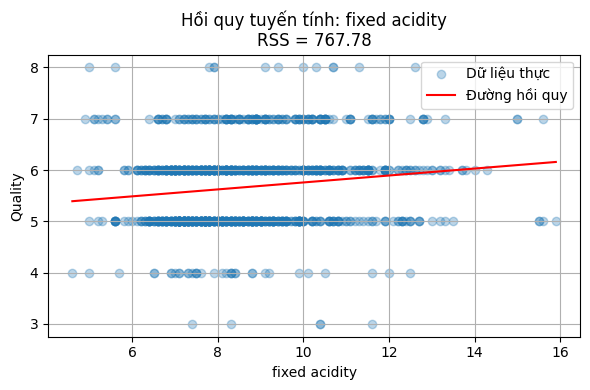

2. Với đặc trưng volatile acidity (x2):
   Phương trình: Y = 6.5556 + -1.7162*x2
   RSS: 671.9006


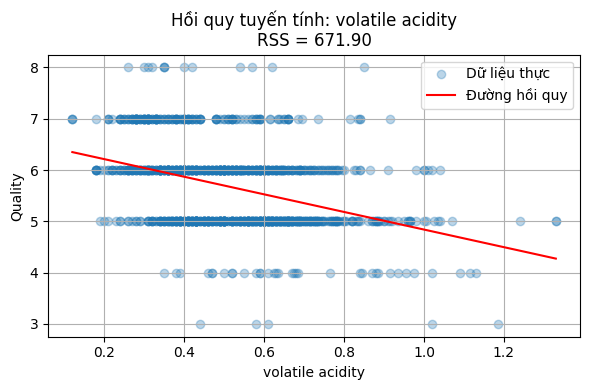

3. Với đặc trưng citric acid (x3):
   Phương trình: Y = 5.3893 + 0.9390*x3
   RSS: 744.3253


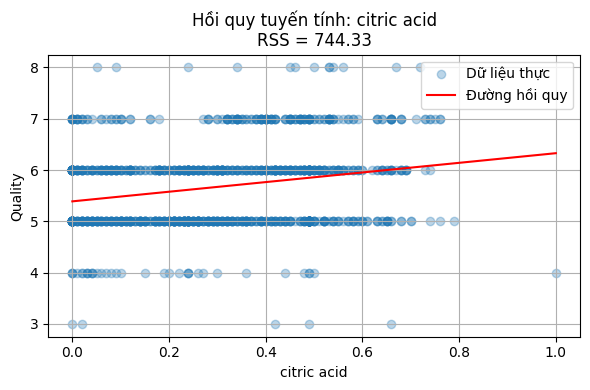

4. Với đặc trưng residual sugar (x4):
   Phương trình: Y = 5.5842 + 0.0314*x4
   RSS: 783.3308


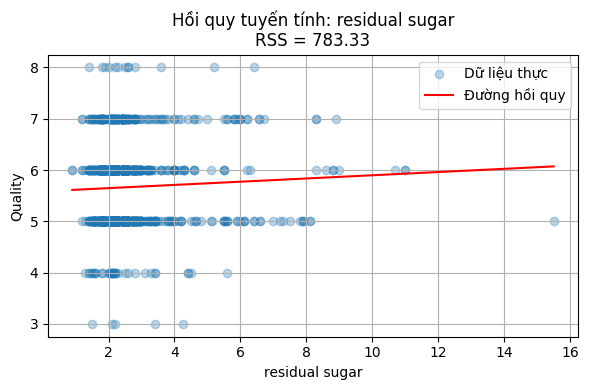

5. Với đặc trưng chlorides (x5):
   Phương trình: Y = 5.8509 + -2.0858*x5
   RSS: 773.0529


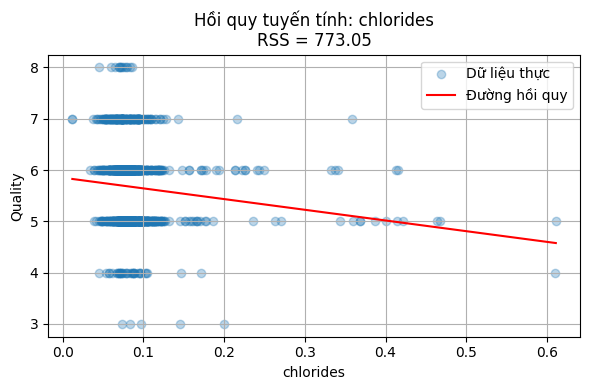

6. Với đặc trưng free sulfur dioxide (x6):
   Phương trình: Y = 5.7553 + -0.0059*x6
   RSS: 780.8043


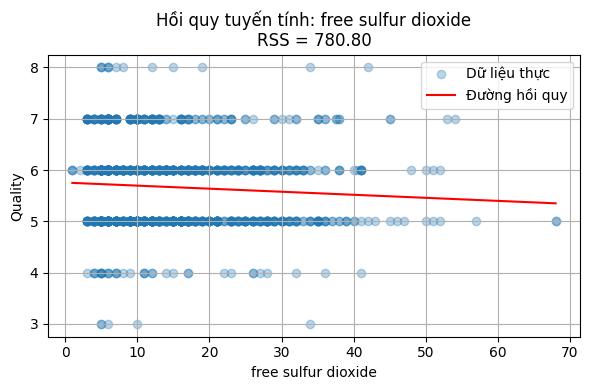

7. Với đặc trưng total sulfur dioxide (x7):
   Phương trình: Y = 5.9184 + -0.0054*x7
   RSS: 744.7977


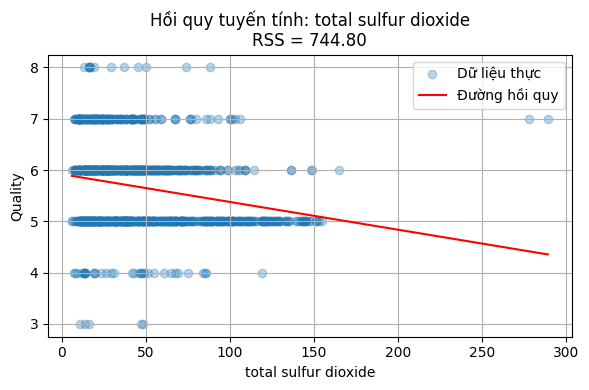

8. Với đặc trưng density (x8):
   Phương trình: Y = 88.3881 + -82.9674*x8
   RSS: 756.1312


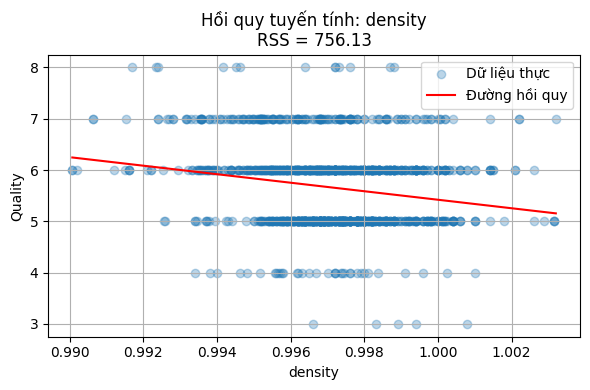

9. Với đặc trưng pH (x9):
   Phương trình: Y = 6.9587 + -0.3923*x9
   RSS: 780.7223


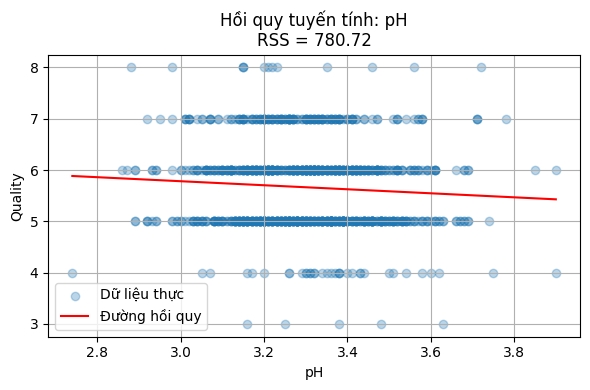

10. Với đặc trưng sulphates (x10):
   Phương trình: Y = 5.0171 + 0.9728*x10
   RSS: 750.1327


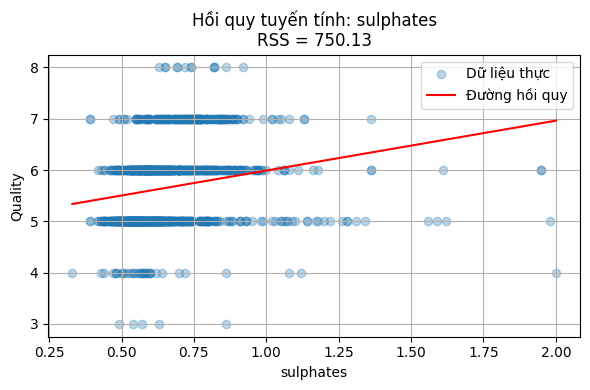

11. Với đặc trưng alcohol (x11):
   Phương trình: Y = 1.7741 + 0.3747*x11
   RSS: 584.6750


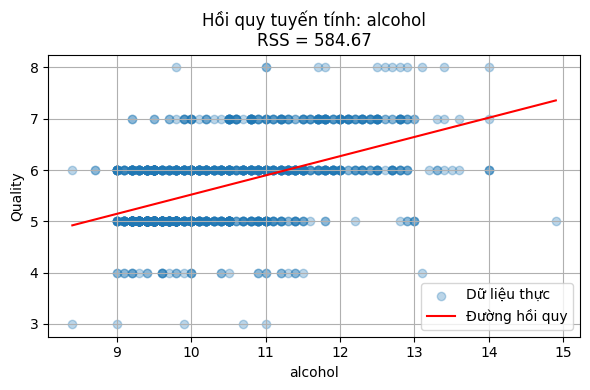

In [414]:

results = []
for i, feature in enumerate(feature_names):
    # Xây dựng ma trận X gồm cột bias (1.0) và đặc trưng hiện tại
    Xi = [[1.0, row[i]] for row in df[feature_names].values.tolist()]
    x_vals = [row[i] for row in df[feature_names].values.tolist()]
    # Huấn luyện hồi quy tuyến tính OLS
    beta = train_ols(Xi, y)
    
    # Tính RSS của mô hình
    rss = rss_loss(y, Xi, beta)
    
    # Lưu kết quả
    results.append((feature, beta, rss))
    
    # In phương trình hồi quy và RSS
    print(f"{i+1}. Với đặc trưng {feature} (x{i+1}):")
    print(f"   Phương trình: Y = {beta[0][0]:.4f} + {beta[1][0]:.4f}*x{i+1}")
    print(f"   RSS: {rss:.4f}")

    # Gọi hàm vẽ biểu đồ
    plot_regression(x_vals, y, beta, feature, rss)


## Bước 3: So sánh và tìm đặc trưng tốt nhất dựa trên RSS


Tổng hợp RSS từng đặc trưng:
1. alcohol: RSS = 584.6750
2. volatile acidity: RSS = 671.9006
3. citric acid: RSS = 744.3253
4. total sulfur dioxide: RSS = 744.7977
5. sulphates: RSS = 750.1327
6. density: RSS = 756.1312
7. fixed acidity: RSS = 767.7763
8. chlorides: RSS = 773.0529
9. pH: RSS = 780.7223
10. free sulfur dioxide: RSS = 780.8043
11. residual sugar: RSS = 783.3308

Thuộc tính tốt nhất để dự đoán quality là 'alcohol' với RSS nhỏ nhất = 584.6750.
Phương trình hồi quy tương ứng: Y = 1.7741 + 0.3747*x


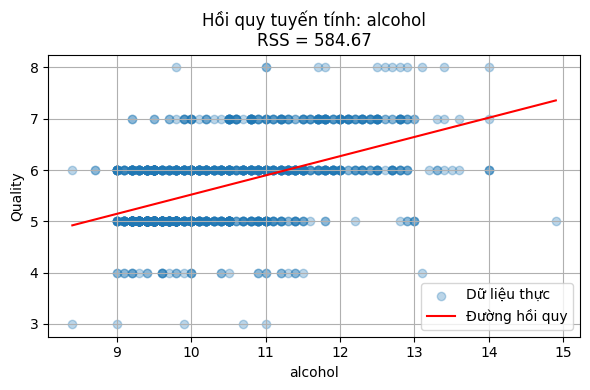

In [415]:
results.sort(key=lambda x: x[2])  # Sắp xếp theo RSS tăng dần
best_feature, best_beta, best_rss = results[0]

print("\nTổng hợp RSS từng đặc trưng:")
for idx, (feature, beta, rss) in enumerate(results, start=1):
    print(f"{idx}. {feature}: RSS = {rss:.4f}")

print(f"\nThuộc tính tốt nhất để dự đoán quality là '{best_feature}' với RSS nhỏ nhất = {best_rss:.4f}.")
print(f"Phương trình hồi quy tương ứng: Y = {best_beta[0][0]:.4f} + {best_beta[1][0]:.4f}*x")

# Lấy giá trị x (không có bias) của đặc trưng tốt nhất
x_best = df[best_feature].values.tolist()

# Gọi hàm để vẽ biểu đồ cho đặc trưng tốt nhất
plot_regression(x_best, y, best_beta, best_feature, best_rss)


### Ý nghĩa

- **RSS nhỏ** → mô hình dự đoán càng sát với dữ liệu thật, tức đặc trưng đó có khả năng dự báo chất lượng rượu tốt hơn.
- Việc chỉ dùng một đặc trưng đơn giúp đánh giá độc lập mức ảnh hưởng của từng đặc trưng lên chất lượng rượu.

# Phần c: Xây dựng mô hình riêng

## Mục tiêu
Mục tiêu của phần này là xây dựng một mô hình hồi quy tuyến tính nhằm tăng khả năng biểu diễn các mối quan hệ phức tạp giữa các yếu tố hóa học và chất lượng rượu.


## Quy trình thực hiện

### 1. Chọn đặc trưng đầu vào (manually selected features)
- Lựa chọn **11 đặc trưng cố định**.
- Danh sách đặc trưng được giữ nguyên thứ tự để đảm bảo tính nhất quán khi mở rộng và tạo đặc trưng tương tác.

### 2. Mở rộng đặc trưng phi tuyến (Polynomial Expansion)
- Với mỗi đặc trưng đã chọn, tạo thêm **5 đặc trưng mới** tương ứng với các lũy thừa bậc 2 đến bậc 6.
- Việc thêm lũy thừa giúp mô hình học được các mối quan hệ **phi tuyến** giữa đặc trưng và biến mục tiêu.

> Ví dụ: nếu chọn đặc trưng `alcohol`, ta tạo thêm `alcohol²`, `alcohol³`, ..., `alcohol⁶`.

### 3. Tạo đặc trưng tương tác (Interaction Feature)
- Tính **tích của toàn bộ 11 đặc trưng đã chọn**, tạo thành một đặc trưng tương tác bậc cao.

### 4. Thêm hệ số chặn (bias term)
- Thêm một phần tử có giá trị `1.0` vào đầu mỗi hàng dữ liệu đặc trưng.
- Cho phép mô hình học được hệ số tự do (intercept) trong phương trình hồi quy.

## Huấn luyện và đánh giá mô hình

### 1. Huấn luyện bằng phương pháp OLS
- Mô hình được huấn luyện bằng **phương pháp bình phương tối thiểu (Ordinary Least Squares - OLS)**.
- Tính toán trọng số hồi quy $\beta$ dựa trên dữ liệu đã được mở rộng.

### 2. Tính sai số RSS
- Đánh giá hiệu quả của mô hình bằng cách tính **RSS (Residual Sum of Squares)**.
- RSS thể hiện tổng bình phương sai số giữa giá trị thực và giá trị dự đoán.
## Biểu diễn mô hình hồi quy

- Toàn bộ phương trình hồi quy được biểu diễn dưới dạng đầy đủ với tất cả đặc trưng:
  - 11 đặc trưng gốc
  - 55 đặc trưng mở rộng (bậc 2 đến 6 cho mỗi đặc trưng)
  - 1 đặc trưng tương tác
  - Tổng cộng: 67 đặc trưng + 1 bias

- Phương trình hồi quy có dạng:

  $$
  y = \beta_0 + \sum_{i=1}^{11} \beta_i x_i + \sum_{i=1}^{11} \sum_{k=2}^{6} \beta_{ik} x_i^k + \beta_{int} \cdot (x_1 \cdot x_2 \cdot ... \cdot x_{11})
  $$


## Tổng kết
Mô hình trong phần này được xây dựng dựa trên đặc trưng thủ công, kết hợp với kỹ thuật mở rộng đa thức và tương tác.


In [416]:


# Tách nhãn và đặc trưng gốc
feature_names_original = df.drop(columns='quality').columns.tolist()
attributes = df.drop(columns='quality').values.tolist()
y = df['quality'].values.tolist()

# Đặc trưng được chọn cứng để thêm vào mô hình
selected_features = [
    'alcohol', 'volatile acidity', 'fixed acidity', 'chlorides', 'sulphates',
    'total sulfur dioxide', 'free sulfur dioxide', 'pH', 'citric acid', 'residual sugar', 'density'
]
print("11 đặc trưng được chọn:", selected_features)

# Lấy index các đặc trưng đã chọn ===
selected_indices = [feature_names_original.index(name) for name in selected_features]

# Tạo đặc trưng mở rộng ===
attributes_enhanced = []
for row in attributes:
    new_row = row[:]  # bản sao hàng gốc

    # Thêm bình phương, lập phương,... đến lũy thừa 6 cho mỗi đặc trưng đã chọn
    for idx in selected_indices:
        val = row[idx]
        new_row.append(val ** 2)
        new_row.append(val ** 3)
        new_row.append(val ** 4)
        new_row.append(val ** 5)
        new_row.append(val ** 6)

    # Tạo đặc trưng tương tác: tích của 11 đặc trưng được chọn
    interaction = 1.0
    for idx in selected_indices:
        interaction *= row[idx]
    new_row.append(interaction)

    attributes_enhanced.append(new_row)

# Thêm bias 
X_enhanced = [[1.0] + row for row in attributes_enhanced]

# Huấn luyện mô hình hồi quy tuyến tính 
beta_enhanced = train_ols(X_enhanced, y)

# Tính RSS
rss_enhanced = rss_loss(y, X_enhanced, beta_enhanced)
print(f"\n RSS sau khi thêm x^2 đến x^6 và tương tác của 11 đặc trưng: {rss_enhanced}")

# In phương trình hồi quy
feature_names = feature_names_original[:]
for name in selected_features:
    feature_names.append(f"{name}^2")
    feature_names.append(f"{name}^3")
    feature_names.append(f"{name}^4")
    feature_names.append(f"{name}^5")
    feature_names.append(f"{name}^6")

# Thêm đặc trưng tương tác
feature_names.append("*".join(selected_features))

equation = f"y = {beta_enhanced[0][0]}"
for j in range(1, len(beta_enhanced)):
    coef = beta_enhanced[j][0]
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef)}*{feature_names[j-1]}"

print("\n Phương trình hồi quy:")
print("   " + equation)


11 đặc trưng được chọn: ['alcohol', 'volatile acidity', 'fixed acidity', 'chlorides', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide', 'pH', 'citric acid', 'residual sugar', 'density']

 RSS sau khi thêm x^2 đến x^6 và tương tác của 11 đặc trưng: 434.5433996224161

 Phương trình hồi quy:
   y = -12661.74296773682 - 12.219719560917866*fixed acidity + 18.586848650527415*volatile acidity + 2.260443298025688*citric acid + 3.456025099351706*residual sugar - 10.180878179911048*chlorides + 0.04199290090178298*free sulfur dioxide + 0.01020695599430238*total sulfur dioxide + 36800.56082186662*density - 16402.92669457452*pH - 26.4810667611971*sulphates + 1724.4383096539914*alcohol - 359.9500669632089*alcohol^2 + 39.72315451110404*alcohol^3 - 2.4453555922830077*alcohol^4 + 0.07968314451043446*alcohol^5 - 0.0010750052915488098*alcohol^6 - 93.93819962575367*volatile acidity^2 + 203.18103151587684*volatile acidity^3 - 214.83629031046917*volatile acidity^4 + 107.01627857107098*volatile aci